In [ ]:
# Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have? 

In [4]:
import pandas as pd

# Load the dataset from an Excel file
dataset_path = "flight_price.xlsx"  
df = pd.read_excel(dataset_path)

# Examine the dimensions (rows and columns) of the dataset
num_rows, num_cols = df.shape
print(f"The dataset has {num_rows} rows and {num_cols} columns.")


The dataset has 10683 rows and 11 columns.


In [ ]:
# Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution


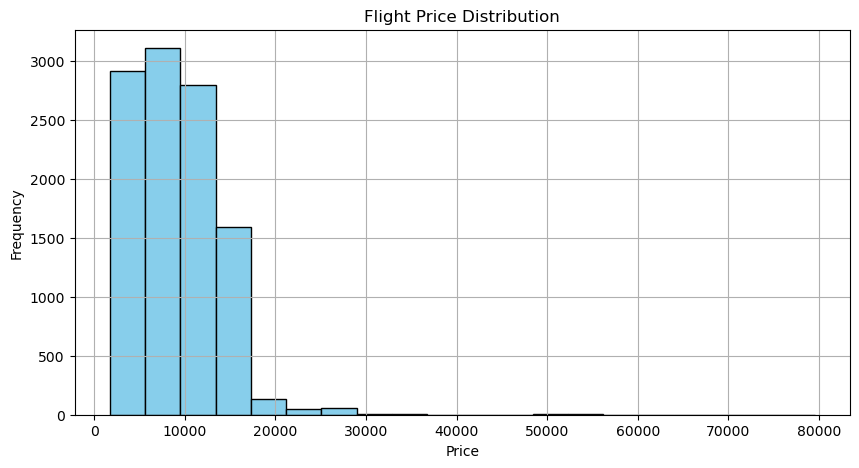

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from an Excel file
dataset_path = "flight_price.xlsx"  
df = pd.read_excel(dataset_path)

# Create a histogram to visualize the distribution of flight prices
plt.figure(figsize=(10, 5))
plt.hist(df['Price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Flight Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
# Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

In [8]:
import pandas as pd

# Load the dataset from an Excel file
dataset_path = "flight_price.xlsx"  
df = pd.read_excel(dataset_path)

# Find the minimum and maximum prices
min_price = df['Price'].min()
max_price = df['Price'].max()

print(f"The range of prices in the dataset is {min_price:.2f} to {max_price:.2f}")


The range of prices in the dataset is 1759.00 to 79512.00


In [ ]:
# Q5. Are there any outliers in the dataset? 

# Identify any potential outliers using a boxplot and describe how they may impact your analysis. 

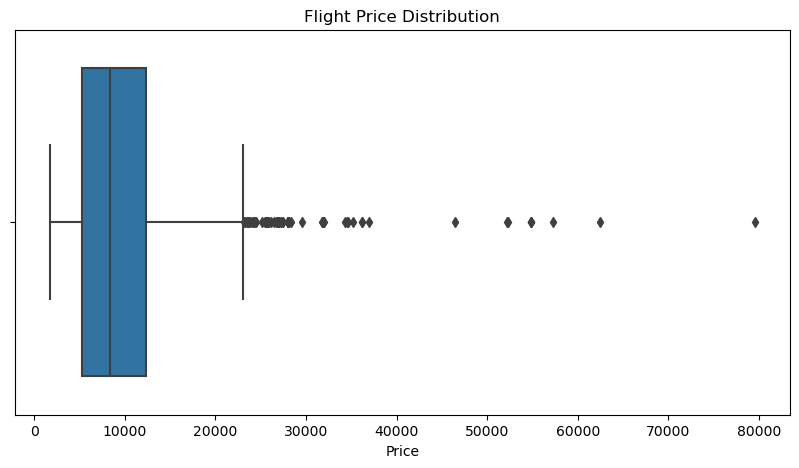

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset from an Excel file
dataset_path = "flight_price.xlsx"  
df = pd.read_excel(dataset_path)

# Create a boxplot to identify potential outliers in flight prices
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Price'])
plt.title('Flight Price Distribution')
plt.xlabel('Price')
plt.show()


Outliers are data points that significantly differ from the rest of the data. In the context of flight prices, outliers could be unusually high or low prices that don't follow the general trend of flight costs. These outliers can impact your analysis in several ways:


Misleading Patterns: Outliers can create artificial patterns in data visualization or analysis, leading to misinterpretation of the actual trends.


Model Performance: If you're building predictive models using machine learning, outliers can negatively impact model performance by introducing noise or bias.

Decision-Making: In real-world scenarios, decisions based on outliers may lead to suboptimal choices or actions.


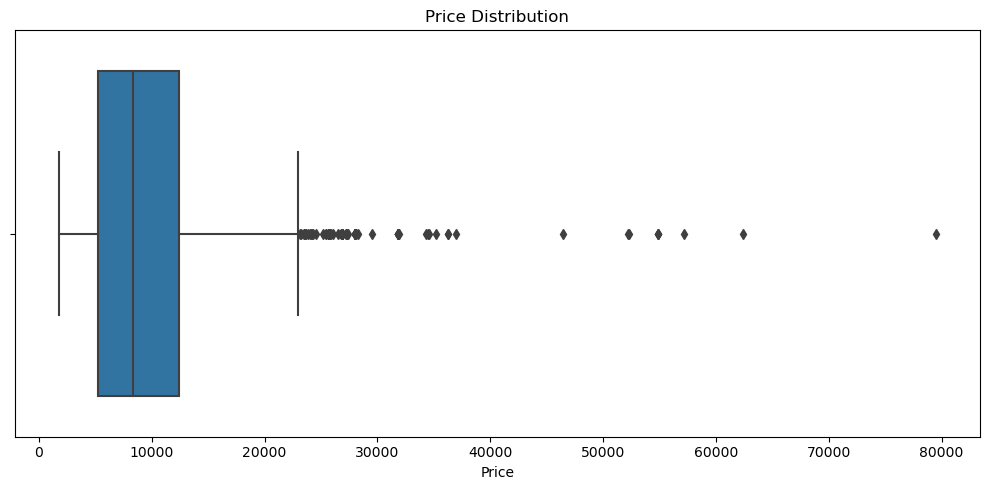

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset from an Excel file
dataset_path = "flight_price.xlsx"  
df = pd.read_excel(dataset_path)

# Create boxplots for each numerical column
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
num_plots = len(numerical_columns)
plt.figure(figsize=(10, 5 * num_plots)) 

for i, column in enumerate(numerical_columns):
    plt.subplot(num_plots, 1, i+1)
    sns.boxplot(x=df[column])
    plt.title(f'{column} Distribution')
    plt.xlabel(column)

plt.tight_layout()
plt.show()


In [ ]:
# Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. 
# What features would you analyze to identify the peak season, and how would you present your findings to your boss?




To identify the peak travel season from the Flight Price dataset, you can analyze various features that could potentially impact travel demand. Here are the key features you should consider:

Date of Journey: This is a crucial feature to analyze. You can extract the month, day of the week, and even specific dates to identify patterns in travel demand.

Price: Analyze the average flight prices for different time periods. Prices tend to increase during peak travel seasons due to higher demand.

Total Stops: Investigate if the number of stops affects travel demand. Direct flights might be more popular during peak seasons.



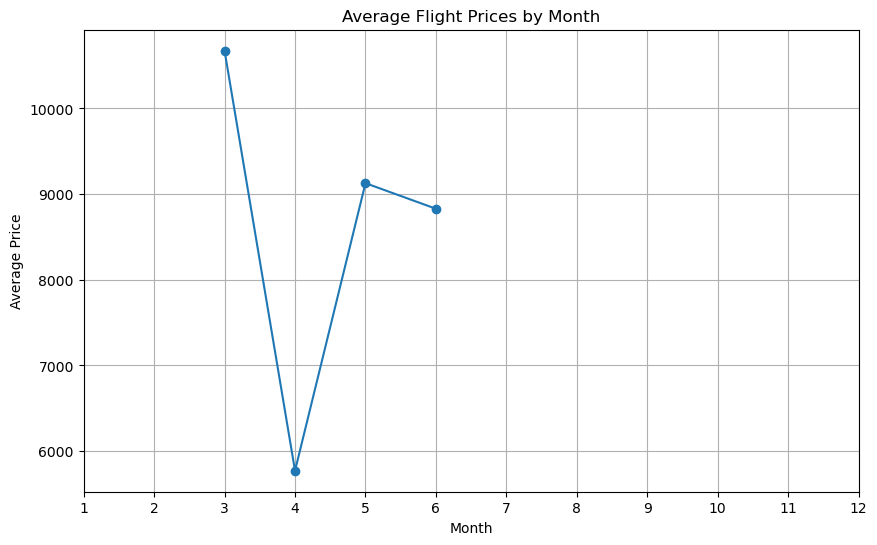

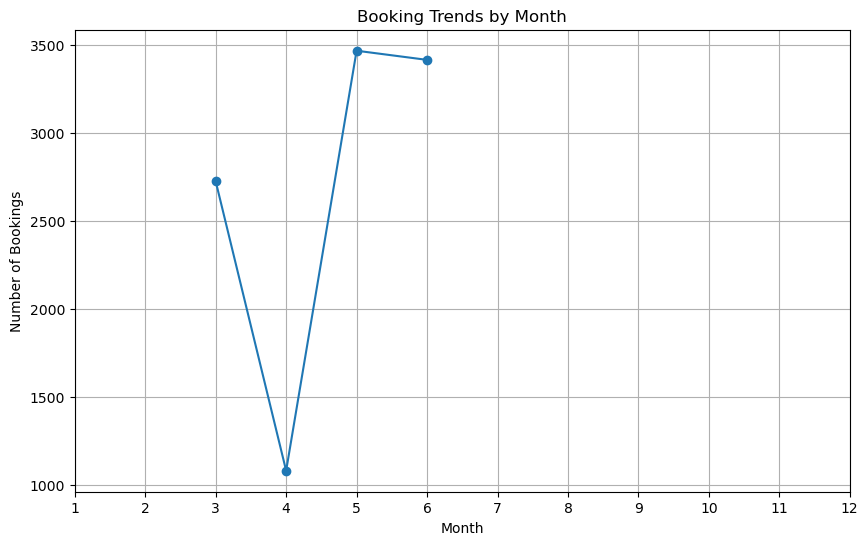

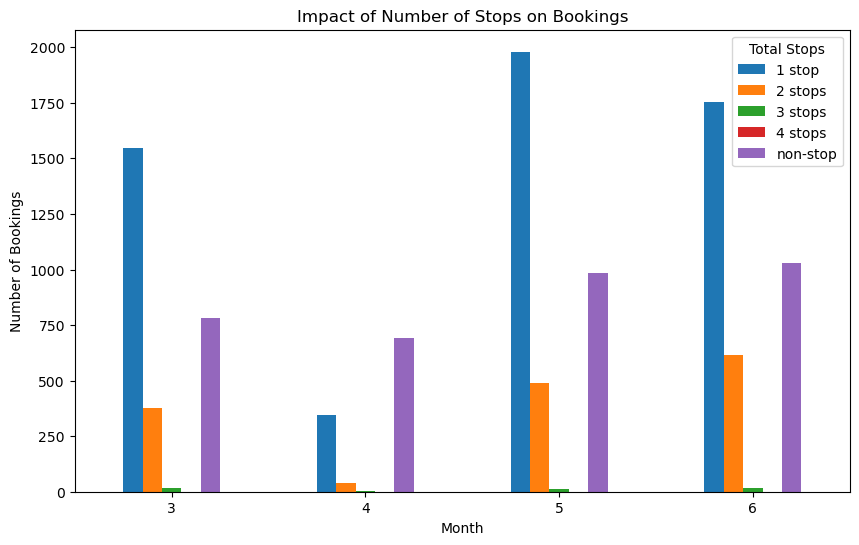

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from an Excel file
dataset_path = "flight_price.xlsx" 
df = pd.read_excel(dataset_path)

# Convert 'Date of Journey' column to datetime
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')

# Step 1: Extract Month and Day of the Week
df['Journey_Month'] = df['Date_of_Journey'].dt.month
df['Day_of_Week'] = df['Date_of_Journey'].dt.dayofweek 

# Step 2: Calculate Average Prices by Month
average_prices_by_month = df.groupby('Journey_Month')['Price'].mean()

# Step 3: Create Booking Trends Line Chart
booking_trends = df.groupby('Journey_Month')['Price'].count()

# Step 4: Analyze Stoppage Impact
stoppage_impact = df.groupby(['Journey_Month', 'Total_Stops'])['Price'].count().unstack()

# Presenting Findings

# Plot Average Prices by Month
plt.figure(figsize=(10, 6))
plt.plot(average_prices_by_month.index, average_prices_by_month.values, marker='o')
plt.title('Average Flight Prices by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

# Plot Booking Trends
plt.figure(figsize=(10, 6))
plt.plot(booking_trends.index, booking_trends.values, marker='o')
plt.title('Booking Trends by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

# Display Stoppage Impact
stoppage_impact.plot(kind='bar', figsize=(10, 6))
plt.title('Impact of Number of Stops on Bookings')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=0)
plt.legend(title='Total Stops')
plt.show()


In [ ]:
# Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. 

# What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?



# Features to Analyze for Price Trends:
Date of Journey: Analyzing how flight prices change over different months, days of the week, or specific dates can reveal seasonal and weekly trends.

Total Stops: Investigate how the number of stops affects flight prices. Non-stop or direct flights might be priced differently from flights with layovers.

Airline: Different airlines might have varying price structures. Analyze price variations across airlines.

Route: Some routes might be more popular and, therefore, more expensive. Investigate how routes impact prices.

Additional Info: If this column contains information about special offers, promotions, or unique circumstances, it could influence prices.

# Visualizations to Present Findings:

Line Charts: Use line charts to visualize how flight prices change over time. Plotting prices against dates, months, or days of the week can reveal trends and patterns.

Boxplots: Boxplots can display the distribution of prices for different categories, such as airlines, number of stops, or routes. They show median, quartiles, and potential outliers.

Bar Charts: Create bar charts to compare average prices across different categories, such as airlines, routes, or number of stops.


Heatmaps: Heatmaps can display a matrix of flight prices, showing how prices change based on combinations of features like months and airlines.



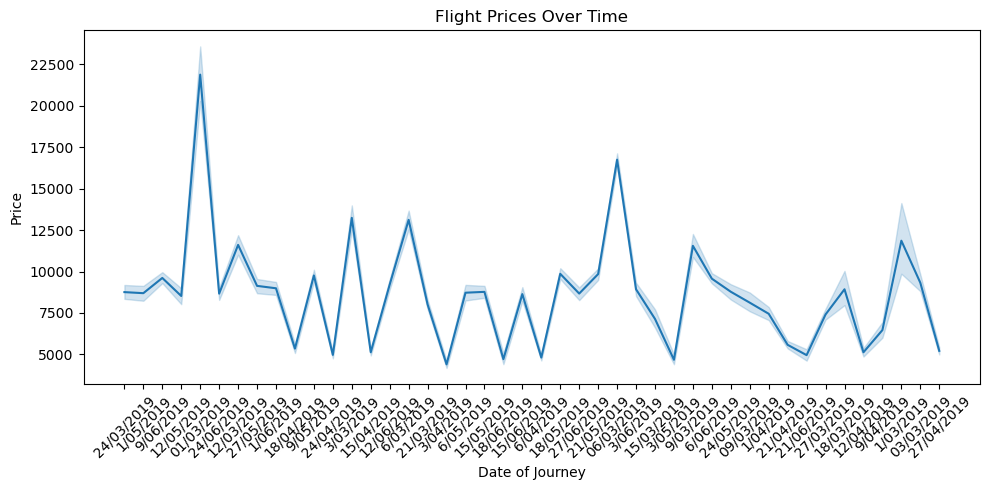

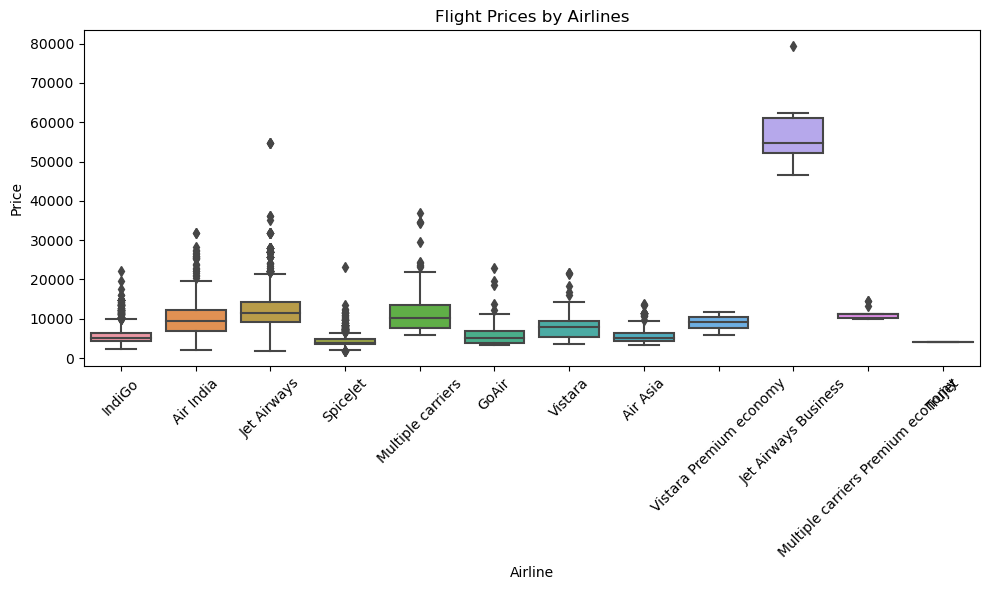

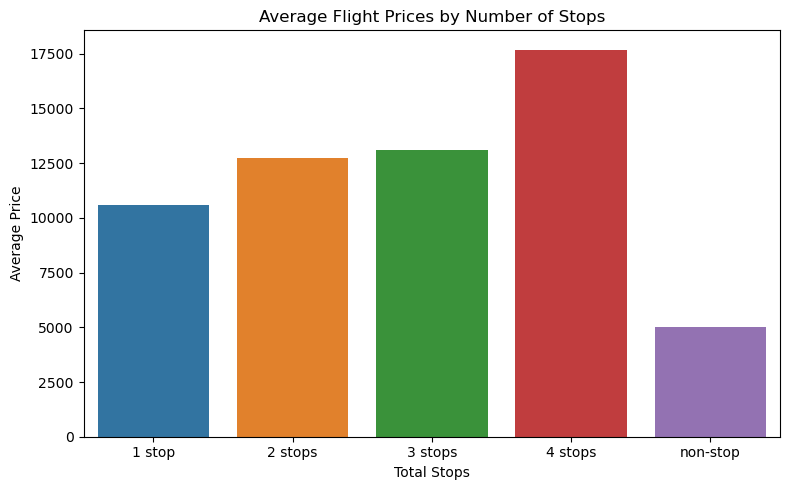

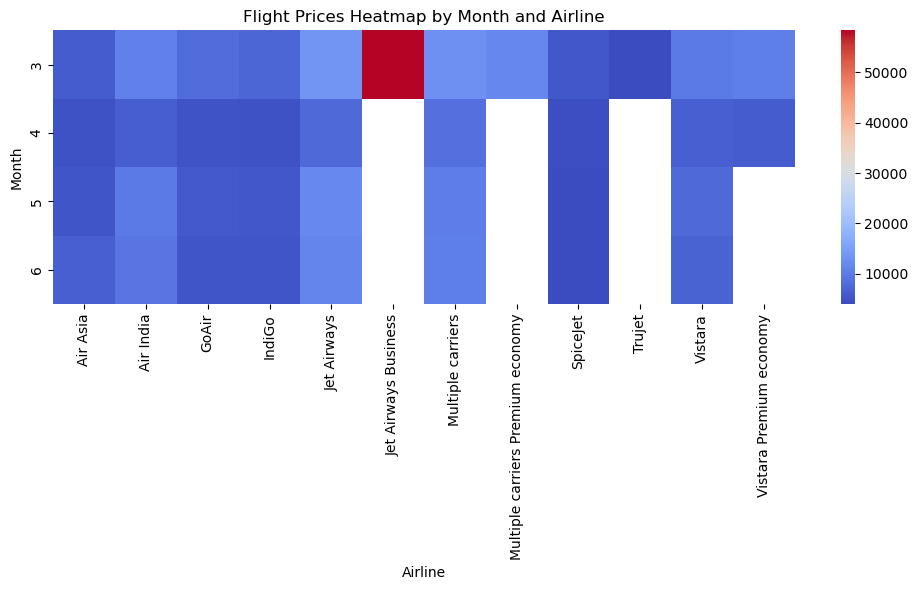

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from an Excel file
dataset_path = "flight_price.xlsx" 
df = pd.read_excel(dataset_path)

# Line chart: Flight prices over time
plt.figure(figsize=(10, 5))
sns.lineplot(x="Date_of_Journey", y="Price", data=df)
plt.title("Flight Prices Over Time")
plt.xlabel("Date of Journey")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Boxplot: Flight prices by airlines
plt.figure(figsize=(10, 6))
sns.boxplot(x="Airline", y="Price", data=df)
plt.title("Flight Prices by Airlines")
plt.xlabel("Airline")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar chart: Average flight prices by number of stops
avg_prices_by_stops = df.groupby("Total_Stops")["Price"].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x="Total_Stops", y="Price", data=avg_prices_by_stops)
plt.title("Average Flight Prices by Number of Stops")
plt.xlabel("Total Stops")
plt.ylabel("Average Price")
plt.tight_layout()
plt.show()




# Convert 'Date of Journey' column to datetime
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')

# Step 1: Extract Month and Day of the Week
df['Journey_Month'] = df['Date_of_Journey'].dt.month

# Heatmap: Flight prices by month and airline
heatmap_data = df.pivot_table(index="Journey_Month", columns="Airline", values="Price", aggfunc="mean")
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="coolwarm")
plt.title("Flight Prices Heatmap by Month and Airline")
plt.xlabel("Airline")
plt.ylabel("Month")
plt.tight_layout()
plt.show()


In [ ]:
# Q8. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. 

# What features would you analyze to identify these factors, and how would you present your findings to the management team?



# Features to Analyze for Price Factors:

Date of Journey: Analyze how prices vary based on the time of year, including specific months and days of the week. Seasonal changes can influence demand and supply.

Total Stops: Investigate how the number of stops affects flight prices. Non-stop flights might be priced differently from flights with layovers.

Airline: Different airlines might have varying pricing strategies. Analyze how prices differ across airlines.

Route: Popular routes might be priced higher due to higher demand. Analyze how different routes impact prices.

Additional Info: This column could contain information about special events, promotions, or unique circumstances that affect pricing.

# Analysis Steps:
Data Exploration: Understand the distribution of flight prices and other features using descriptive statistics and visualizations.

Visualizations: Create various types of visualizations to showcase the relationships between features and flight prices.



# Presentation to Management:
When presenting your findings to the management team, you should aim to provide actionable insights. 


              Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000


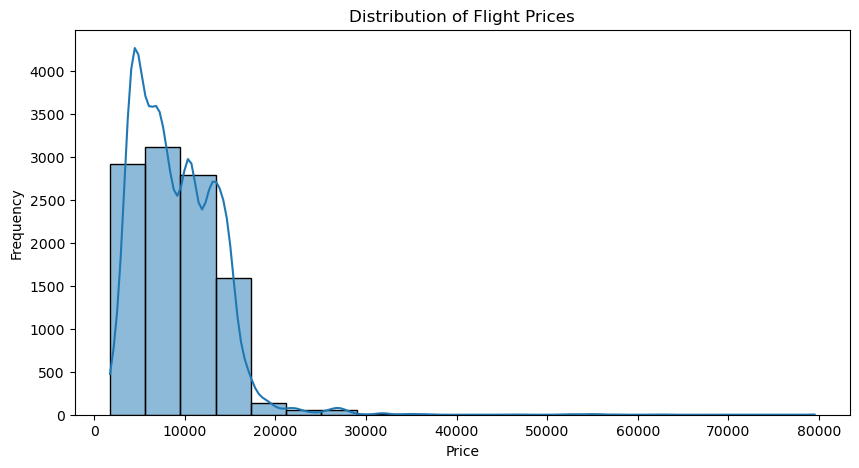

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from an Excel file
dataset_path = "flight_price.xlsx"
df = pd.read_excel(dataset_path)

# Data Exploration: Descriptive statistics
print(df.describe())

# Visualizations: Distribution of flight prices
plt.figure(figsize=(10, 5))
sns.histplot(df['Price'], bins=20, kde=True)
plt.title("Distribution of Flight Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()




In [31]:
import pandas as pd

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')


# Save the modified dataset to your local machine
output_file_path = 'Googleplaystore.csv'
df.to_csv(output_file_path, index=False)

print(f"Dataset saved to {output_file_path}") 


Dataset saved to Googleplaystore.csv


In [ ]:
# Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have.


In [30]:
import pandas as pd

# Load the dataset 
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')

# Examine the dimensions (rows and columns) of the dataset
num_rows, num_cols = df.shape
print(f"The dataset has {num_rows} rows and {num_cols} columns.")


The dataset has 10841 rows and 13 columns.


In [ ]:
# Q10. How does the rating of apps vary by category? 
# Create a boxplot to compare the ratings of different app categories. 



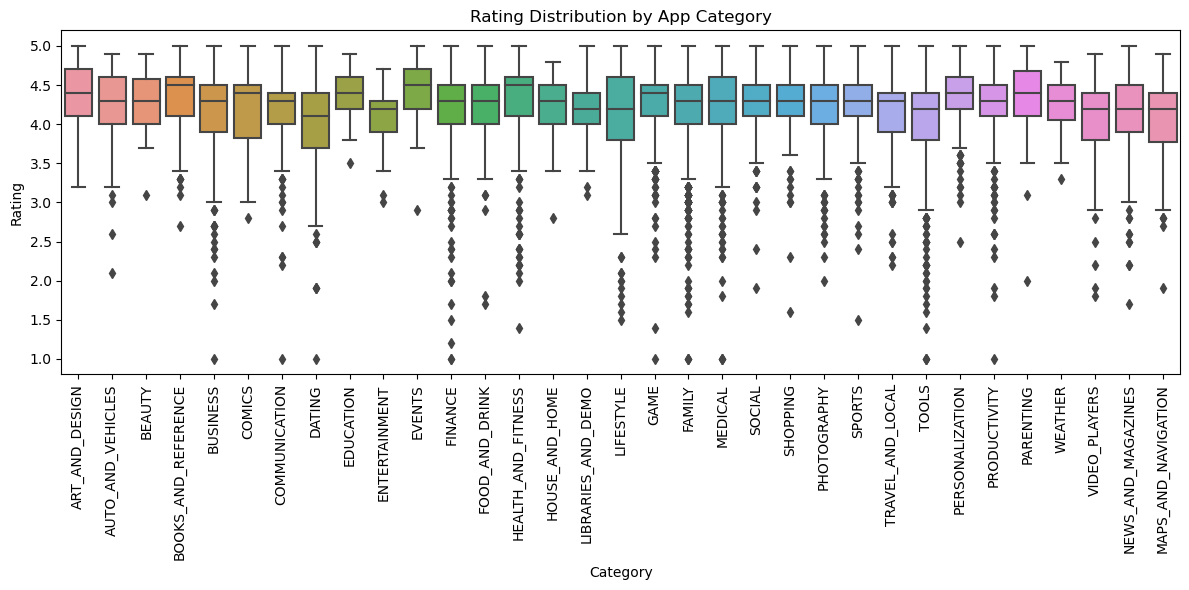

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')


# Filter the dataset to include only ratings in the range of 1 to 5
df_filtered = df[(df['Rating'] >= 1) & (df['Rating'] <= 5)]

# Create a boxplot to compare ratings by category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Rating', data=df_filtered)
plt.xticks(rotation=90)
plt.title('Rating Distribution by App Category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.tight_layout()



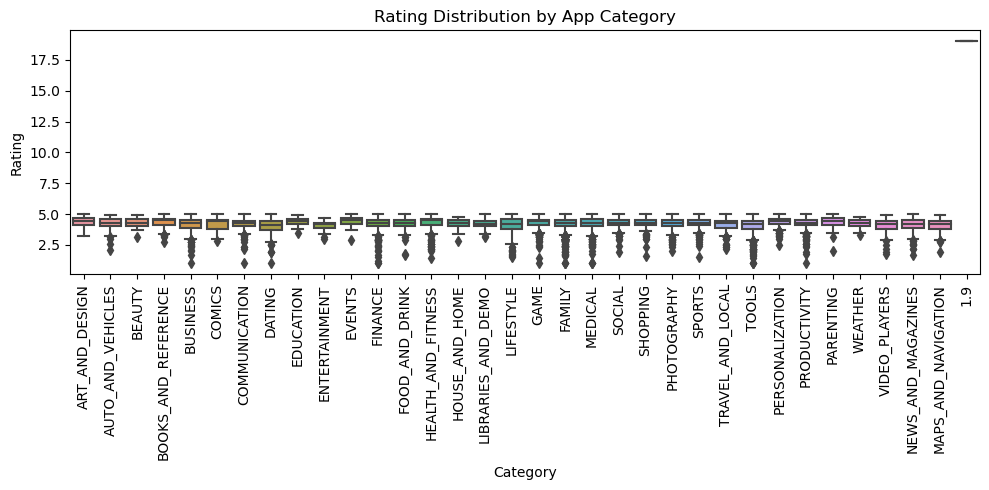

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')


rating_range_start = int(df['Rating'].min())
rating_range_end = int(df['Rating'].max())
df_filtered = df[(df['Rating'] >= rating_range_start) & (df['Rating'] <= rating_range_end)] 

# Create a boxplot to compare ratings by category
plt.figure(figsize=(10, 5)) 
sns.boxplot(x='Category', y='Rating', data=df_filtered)
plt.xticks(rotation=90)
plt.title('Rating Distribution by App Category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.tight_layout()


In [ ]:
# Q11. Are there any missing values in the dataset? 

# Identify any missing values and describe how they may impact your analysis.


In [47]:
import pandas as pd

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')

# Check for missing values
missing_values = df.isnull().sum()

# Print missing values count for each column
print("Missing Values Count for Each Column:")
print(missing_values)

# Calculate the percentage of missing values
total_cells = df.size
total_missing = missing_values.sum()
missing_percentage = (total_missing / total_cells) * 100

print(f"\nTotal Missing Values: {total_missing}")
print(f"Percentage of Missing Values: {missing_percentage:.2f}%")


Missing Values Count for Each Column:
App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Total Missing Values: 1487
Percentage of Missing Values: 1.06%


Data Integrity: Missing values can distort the integrity of your dataset, affecting the accuracy of analysis and modeling.

Biased Results: If the missing data is not randomly distributed, it can lead to biased results and incorrect insights.

Visualizations: Missing values can affect the appearance and interpretation of visualizations, especially if missing data is not represented correctly.

Modeling: Many machine learning algorithms cannot handle missing values, so imputation or other strategies are needed before building predictive models.

Data-Driven Decisions: Depending on the extent of missing data, you might need to consider the reliability of making data-driven decisions based on incomplete information.



In [ ]:
# Q12. What is the relationship between the size of an app and its rating? 

# Create a scatter plot to visualize the relationship.



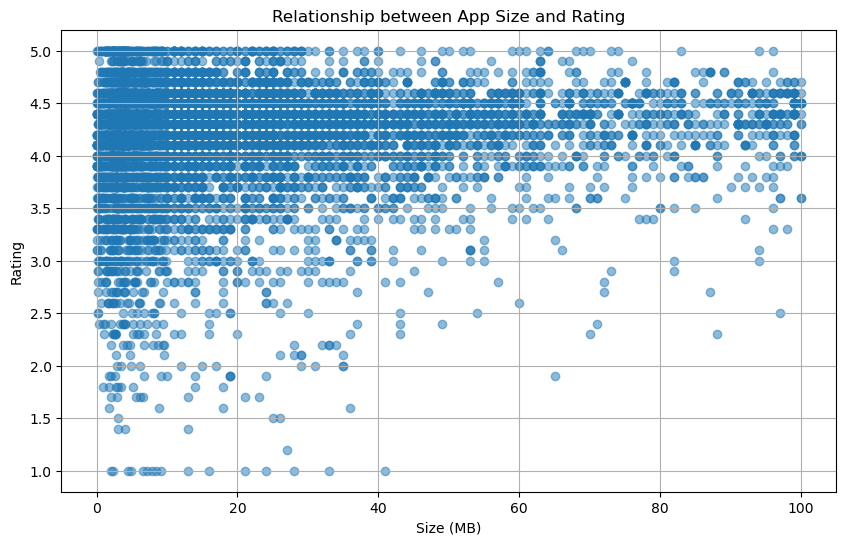

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')

# Convert 'Size' column to numeric
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M', ''))
    elif 'k' in size:
        return float(size.replace('k', '')) / 1024
    else:
        return None  # Handle 'Varies with device'

df['Size'] = df['Size'].apply(convert_size)

# Create a scatter plot to visualize the relationship between size and rating
plt.figure(figsize=(10, 6))
plt.scatter(df['Size'], df['Rating'], alpha=0.5)
plt.title('Relationship between App Size and Rating')
plt.xlabel('Size (MB)')
plt.ylabel('Rating')
plt.grid(True)
plt.show()


In [ ]:
# Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.


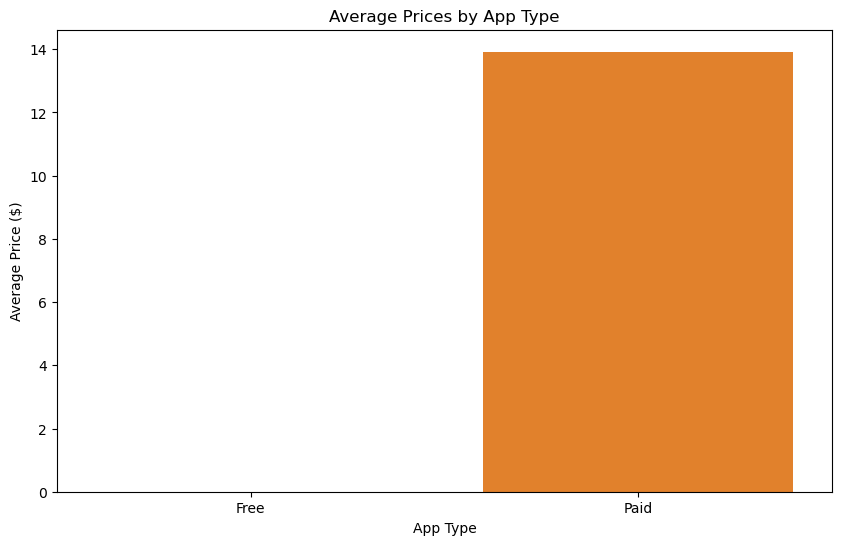

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')

# Remove special characters and convert 'Price' column to numeric
df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')  # Use 'coerce' to handle non-numeric values

# Remove rows where 'Price' column couldn't be converted to numeric
df = df.dropna(subset=['Price'])

# Create a bar chart to compare average prices by app type
plt.figure(figsize=(10, 6))
sns.barplot(x='Type', y='Price', data=df, errorbar=None)
plt.title('Average Prices by App Type')
plt.xlabel('App Type')
plt.ylabel('Average Price ($)')
plt.show()


In [ ]:
# Q14. What are the top 10 most popular apps in the dataset? 

# Create a frequency table to identify the apps with the highest number of installs. 



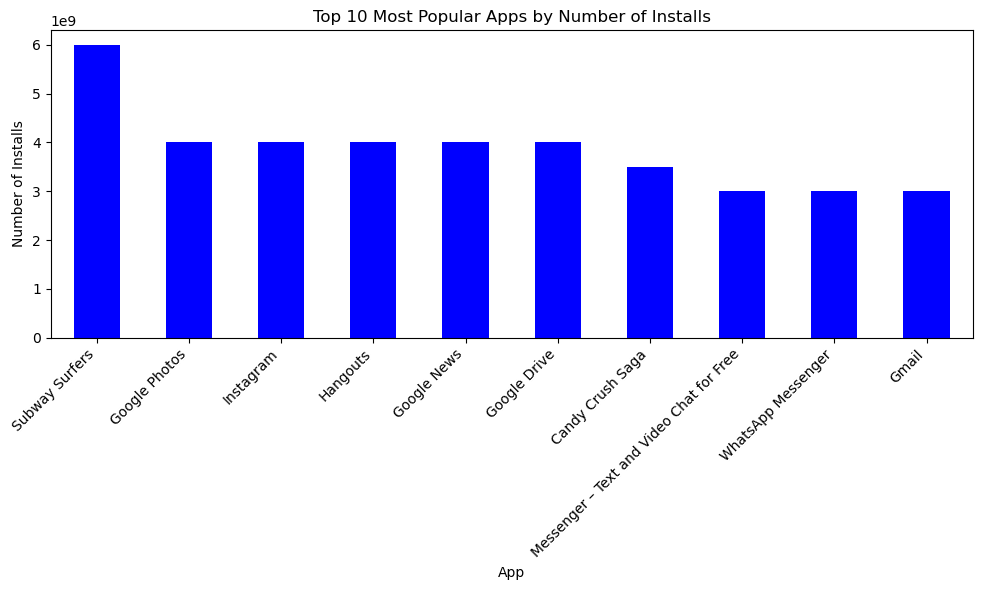

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')

# List of characters to remove
chars_to_remove = ['+', ',']

# Columns to clean
cols_to_clean = ['Installs']

# Loop through columns to clean
for col in cols_to_clean:
    for char in chars_to_remove:
        df[col] = df[col].str.replace(char, '', regex=False)

# Now df['Installs'] column does not contain '+' or ','

# Convert 'Installs' column to numeric
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

# Create a frequency table for app installs and sort in descending order
install_frequency = df.groupby('App')['Installs'].sum().sort_values(ascending=False)

# Select the top 10 most popular apps
top_10_apps = install_frequency.head(10)

# Create a bar graph to visualize the top 10 most popular apps by installs
plt.figure(figsize=(10, 6))
top_10_apps.plot(kind='bar', color='blue')
plt.title('Top 10 Most Popular Apps by Number of Installs')
plt.xlabel('App')
plt.ylabel('Number of Installs')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
# Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the Google Playstore dataset to identify the most popular app categories.


# How would you approach this task, and what features would you analyze to make recommendations to the company?




Identify the category with the most apps and consider it the most popular category based on the number of apps in that category.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')

# Analyze App Categories
category_counts = df['Category'].value_counts()

# Find the most popular category (category with the most apps)
most_popular_category = category_counts.idxmax()
# The idxmax() function returns the index (in this case, the category) where the maximum value occurs.

most_popular_category_count = category_counts.max() 

# Bar chart to visualize the number of apps per category
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Number of Apps per Category')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.xticks(rotation=90)
plt.show()

# Display the most popular category and its count
print(f"The most popular category is '{most_popular_category}' with {most_popular_category_count} apps.")
